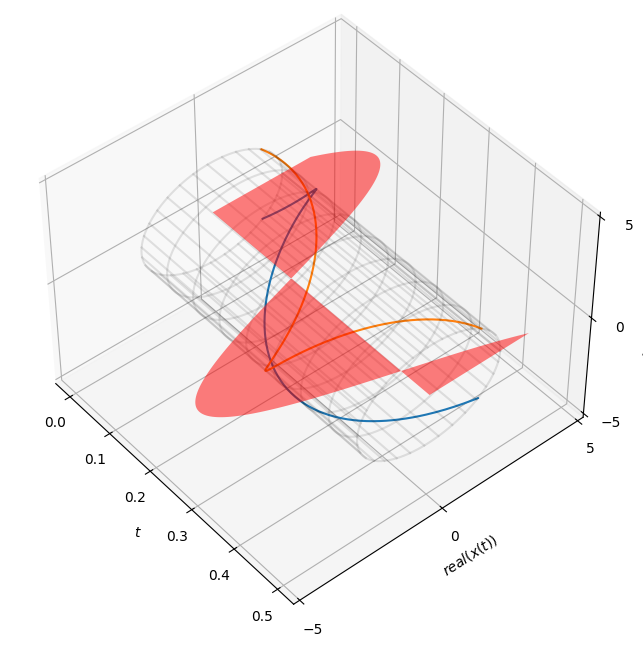

In [2]:
# -------------- Fourier series for ISS lectures --------------------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d

# a "wire barrel" to see better what happens ...
def complex_cylinder(t1, t2, r, fig):
    '''kresli sedy drateny valec ve 3d tak, aby byla dobre videt komplexni exponenciala.
    t1 je pocatecni cas
    t2 je koncovy cas
    r je polomer
    fig je obrazek'''
    phi = np.linspace(0,2 * np.pi,100)
    t = np.linspace(t1,t2,9)
    kolo = r * np.exp(1j * phi)
    for tt in t:
        fig.plot3D(tt * np.ones(phi.shape), np.real(kolo), np.imag(kolo),color='k',alpha=0.1)
    phi = np.linspace(0,2 * np.pi,32)
    kolo = r * np.exp(1j * phi)
    for z in kolo:
        line=art3d.Line3D(*zip((t1,np.real(z),np.imag(z)), (t2,np.real(z),np.imag(z))), markevery=(1, 1), color='k',alpha=0.1)
        ax.add_line(line)

# >>>>>>>>>>>>>>>>> #cos_complex_exp <<<<<<<<<<<<<<<<<<<<<<<<<
T1 = 0.5
om1 = 2 * np.pi / T1
phase = -np.pi / 4   # <---- set phase here
magnitude = 5
fig=plt.figure(figsize=(6,6))
ax = fig.add_axes((0,0,1,1),projection="3d")
t = np.linspace(0,T1,num=200)

c1 = magnitude /2 * np.exp(1j * phase)
cm1 = np.conj(c1)
xplus = c1*np.exp(1j*om1*t)
xminus = cm1*np.exp(-1j*om1*t)
ax.plot3D(t, np.real(xplus), np.imag(xplus))
ax.plot3D(t, np.real(xminus), np.imag(xminus))
complex_cylinder(0,T1,2.5,ax)

x = magnitude*np.cos(om1*t + phase)
aux1 = np.pad(t, (1,1), 'constant', constant_values=(0,np.max(t)))
aux2 = np.pad(x, (1,1), 'constant', constant_values=(0,0))
aux3 = np.pad(np.zeros(t.shape), (1,1), 'constant', constant_values=(0,0))
verts = [list(zip(aux1,aux2,aux3))]
cos2d = mplot3d.art3d.Poly3DCollection(verts, alpha=0.5, linewidth=1)
cos2d.set_facecolor((1, 0, 0, 0.2))   # 0.2 is alpha
ax.add_collection3d(cos2d)

ax.set_xlabel('$t$')
ax.set_ylabel('$real(x(t))$')
ax.set_zlim3d(-5,5)
ax.set_ylim3d(-5,5)

ax.set_yticks([-5, 0, 5])
ax.set_zticks([-5, 0, 5])
#ax.set_xticks([0, 0.01, 0.02])
ax.set_zlabel('$imag(x(t))$')
ax.view_init(elev=45, azim=-40)

###plt.savefig('FIG/cosomegat.pdf')

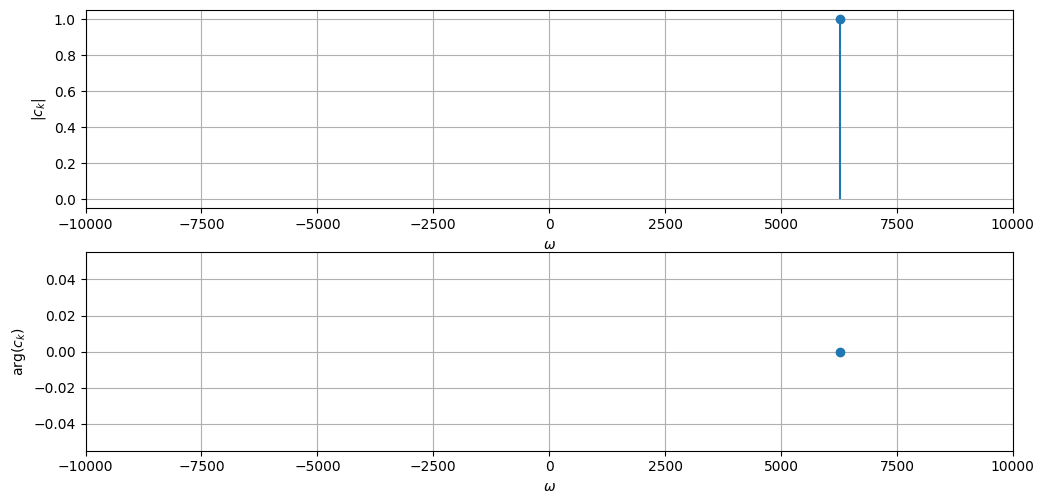

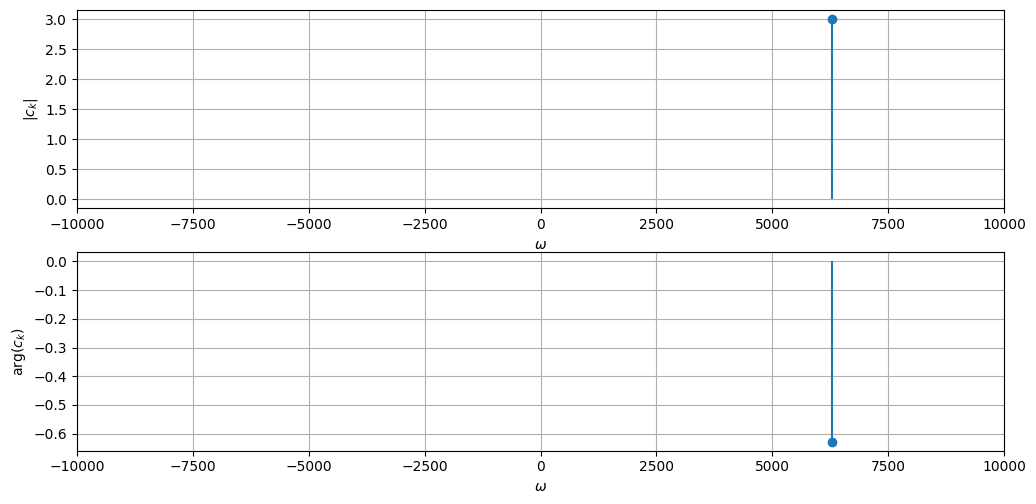

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_complex_exp <<<<<<<<<<<<<<<<<<<<<<<<<
# omega1 = 2000 pi rad /s
fig, ax = plt.subplots(2,1, figsize=(10,5))
fig.tight_layout()

ax[0].stem([2000*np.pi],[1],basefmt=" ")  # nechci cervenou baseline ... 1 value to array ...
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xlim(-10000,10000)
ax[0].set_xlabel('$\omega$')
ax[0].grid()
ax[1].stem([2000*np.pi],[0],basefmt=" ")  # nechci cervenou baseline ...1 value to array ...
ax[1].set_ylabel('arg$(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].set_xlim(-10000,10000)
ax[1].grid()
#plt.savefig('FIG/cexp_raw_ck.pdf')

# the same, c1 = 3 exp(-1 pi / 5)
fig, ax = plt.subplots(2,1, figsize=(10,5))
fig.tight_layout()

ax[0].stem([2000*np.pi],[3],basefmt=" ")  # nechci cervenou baseline ... 1 value to array ...
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xlim(-10000,10000)
ax[0].set_xlabel('$\omega$')
ax[0].grid()
ax[1].stem([2000*np.pi],[-np.pi/5],basefmt=" ")  # nechci cervenou baseline ...1 value to array ...
ax[1].set_ylabel('arg$(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].set_xlim(-10000,10000)
ax[1].grid()
#plt.savefig('FIG/cexp_ck.pdf')

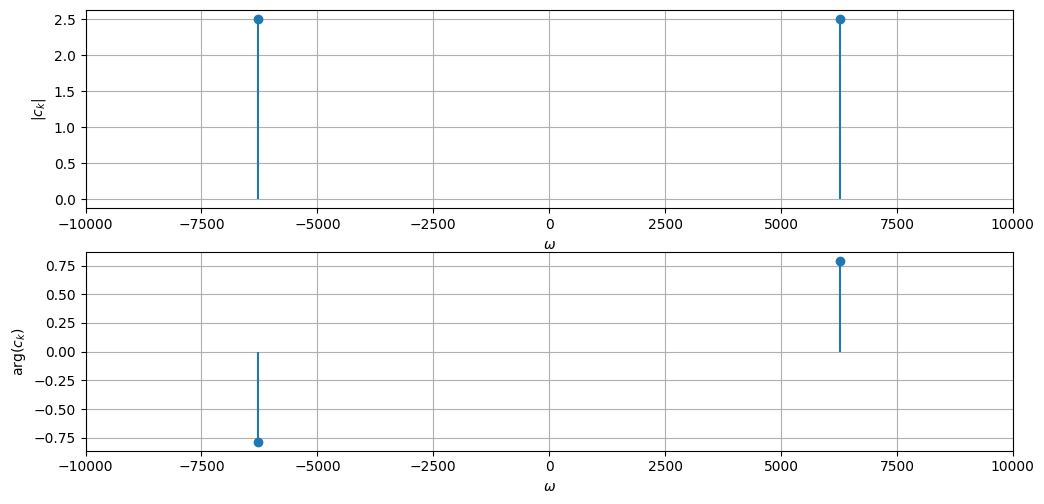

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_cos <<<<<<<<<<<<<<<<<<<<<<<<<
# x[n] = 5 cos (2000 pi t + pi / 4)
mag = 2.5
phase = np.pi/4
om1 = 2000*np.pi
fig, ax = plt.subplots(2,1, figsize=(10,5))
fig.tight_layout()
ax[0].stem([-om1,om1],[mag, mag],basefmt=" ")  # nechci cervenou baseline ... 1 value to array ...
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xlim(-10000,10000)
ax[0].set_xlabel('$\omega$')
ax[0].grid()
ax[1].stem([-om1,om1],[-phase,phase],basefmt=" ")  # nechci cervenou baseline ...1 value to array ...
ax[1].set_ylabel('arg$(c_k)$')
ax[1].set_xlabel('$\omega$')
ax[1].set_xlim(-10000,10000)
ax[1].grid()
#plt.savefig('FIG/cexp_raw_ck.pdf')


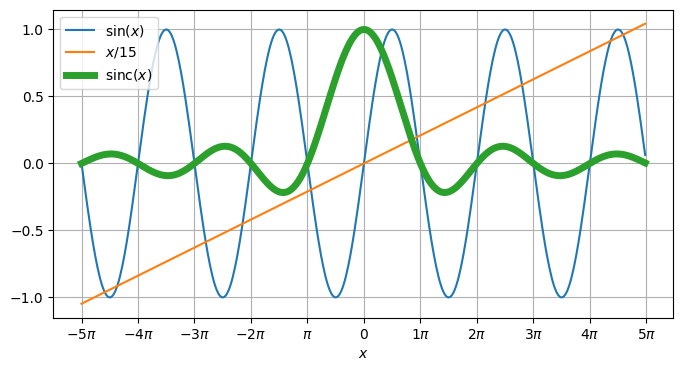

In [ ]:
# >>>>>>>>>>>>>>>>> #sinc <<<<<<<<<<<<<<<<<<<<<<<<<
x = np.arange(-5*np.pi, 5*np.pi,np.pi/50)
ysin = np.sin(x)
ysinc = np.sinc(x/np.pi)
plt.figure(figsize=(8,4))
plt.plot(x,ysin,label='$\sin(x)$')
plt.plot(x,x/15,label='$x/15$')
plt.plot(x,ysinc,label='sinc$(x)$', linewidth=5)

plt.gca().set_xlabel('$x$')
plt.gca().grid()
plt.gca().set_xticks(np.arange(-5*np.pi, 6*np.pi,np.pi))
plt.gca().set_xticklabels(['$-5\pi$', '$-4\pi$','$-3\pi$','$-2\pi$','$\pi$','$0$','$1\pi$','$2\pi$','$3\pi$','$4\pi$','$5\pi$'])
plt.gca().legend()

#plt.savefig('FIG/sinc.pdf')

Text(0.5, 36.72222222222221, '$\\omega$')

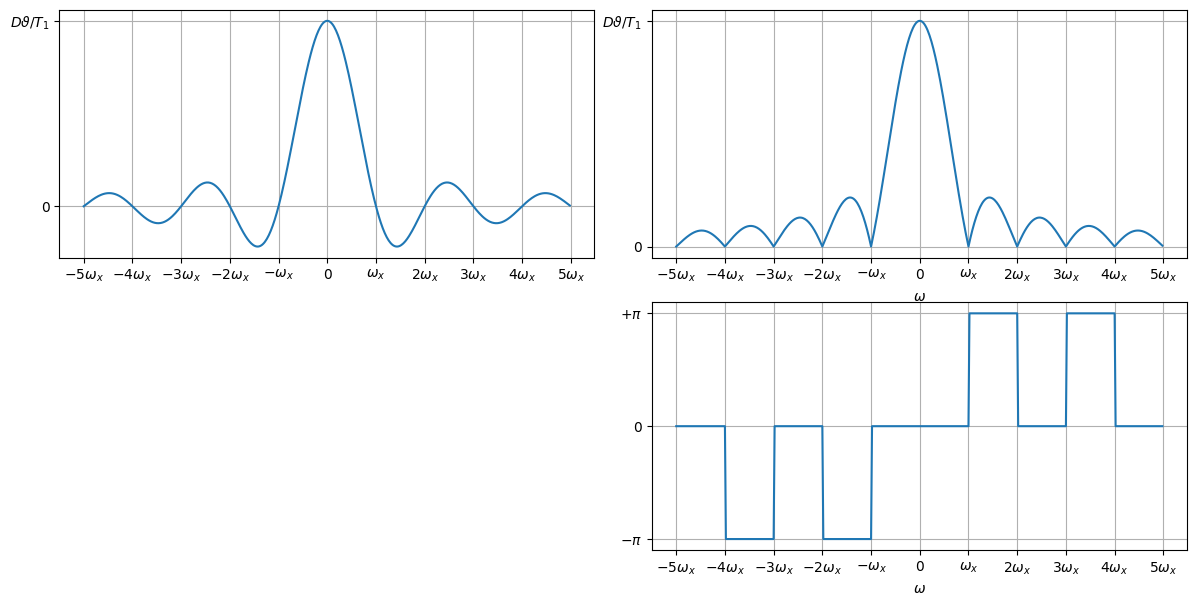

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_auxiliary   <<<<<<<<<<<<<<<<<<<<<<<<<
D =1
om1 = 20 # won't plot it ...
T1 = 2 * np.pi / om1
theta = 0.17
om_cross = 2 * np.pi / theta
om = np.arange(-5*om_cross, 5*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]
omticks = np.arange(-5*om_cross, 6*om_cross, om_cross)
#omticklabels = ['$\frac{2\pi}{\vartheta}$']
omticklabels = ['$-5\omega_x$', '$-4\omega_x$','$-3\omega_x$','$-2\omega_x$','$-\omega_x$','0','$\omega_x$','$2\omega_x$','$3\omega_x$','$4\omega_x$','$5\omega_x$',]

fig, ax = plt.subplots(2,2,figsize=(12,6))
fig.tight_layout()

ax[0,0].plot(om,rsinc)
ax[0,0].grid()
ax[0,0].set_xticks(omticks)
ax[0,0].set_xticklabels(omticklabels)
ax[0,0].set_yticks([0, D * theta / T1])
ax[0,0].set_yticklabels(['0', '$D \\vartheta / T_1$'])
ax[1,0].axis('off')
ax[0,1].plot(om,msinc)
ax[0,1].grid()
ax[0,1].set_xticks(omticks)
ax[0,1].set_xticklabels(omticklabels)
ax[0,1].set_yticks([0, D * theta / T1])
ax[0,1].set_yticklabels(['0', '$D \\vartheta / T_1$'])
ax[0,1].set_xlabel('$\omega$')

ax[1,1].plot(om,asinc)
ax[1,1].grid()
ax[1,1].set_xticks(omticks)
ax[1,1].set_xticklabels(omticklabels)
ax[1,1].set_yticks([-np.pi, 0 , np.pi])
ax[1,1].set_yticklabels(['$-\pi$', '0', '$+\pi$'])
ax[1,1].set_xlabel('$\omega$')

#plt.savefig('FIG/sinc_real_modul_arg.pdf')

Text(112.72222222222221, 0.5, 'arg $c_k$')

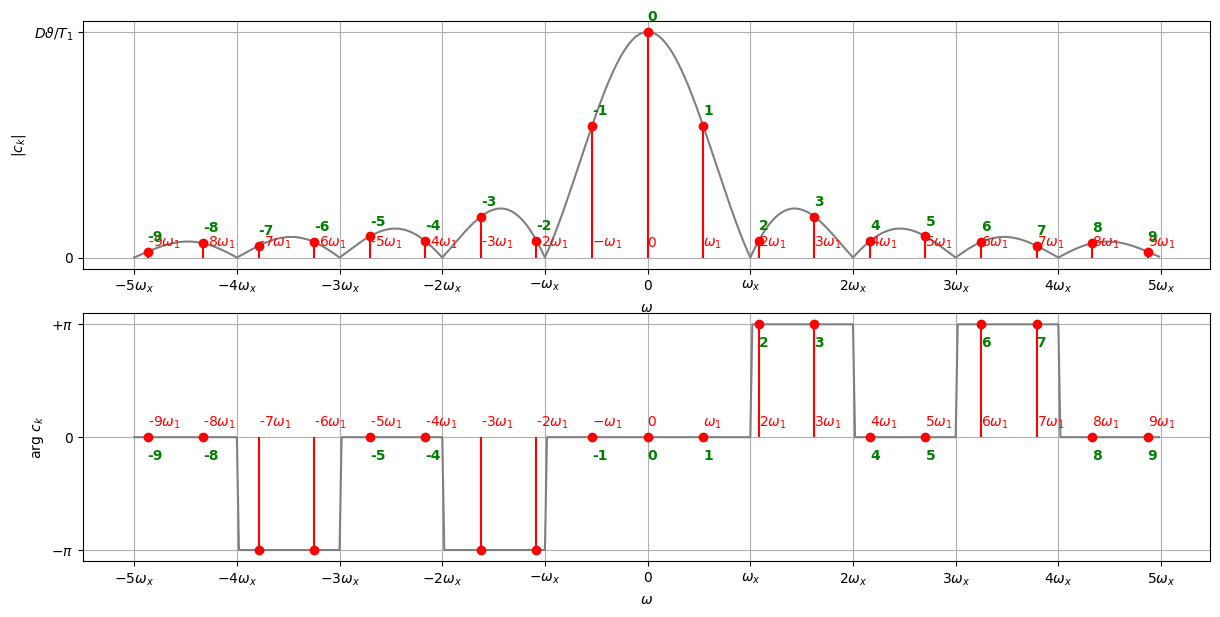

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_full <<<<<<<<<<<<<<<<<<<<<<<<<
# generate some coeffs ... first a lot, then limit it as I'm lazy to calculate how many we should have ...
kmax = int(5 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

# pekny vektor popisu ...
kom1text = list()
for ii in range(len(k)):
    kom1text.append (str(int(k[ii])) + "$\omega_1$")
# fixing 0, 1 and -1 ...
kom1text[kmax] = '0'
kom1text[kmax+1] = "$\omega_1$"
kom1text[kmax-1] = "$-\omega_1$"
#print(kom1text)

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
ax[0].set_yticks([0, D * theta / T1])
ax[0].set_yticklabels(['0', '$D \\vartheta / T_1$'])
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(kom1text):
    ax[0].annotate(txt, (k[ii] * om1, D * theta / T1 / 20),color='r')
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')

ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_yticks([-np.pi, 0 , np.pi])
ax[1].set_yticklabels(['$-\pi$', '0', '$+\pi$'])
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(kom1text):
    ax[1].annotate(txt, (k[ii] * om1, np.pi/10),color='r')
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')

#plt.savefig('FIG/ck_obd.pdf')

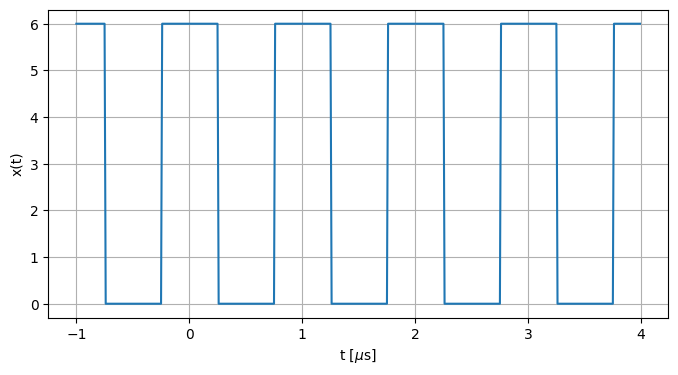

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 1000000
T1 = 1/f1
theta = T1 / 2
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_1MHz.pdf')

Text(112.72222222222221, 0.5, 'arg $c_k$')

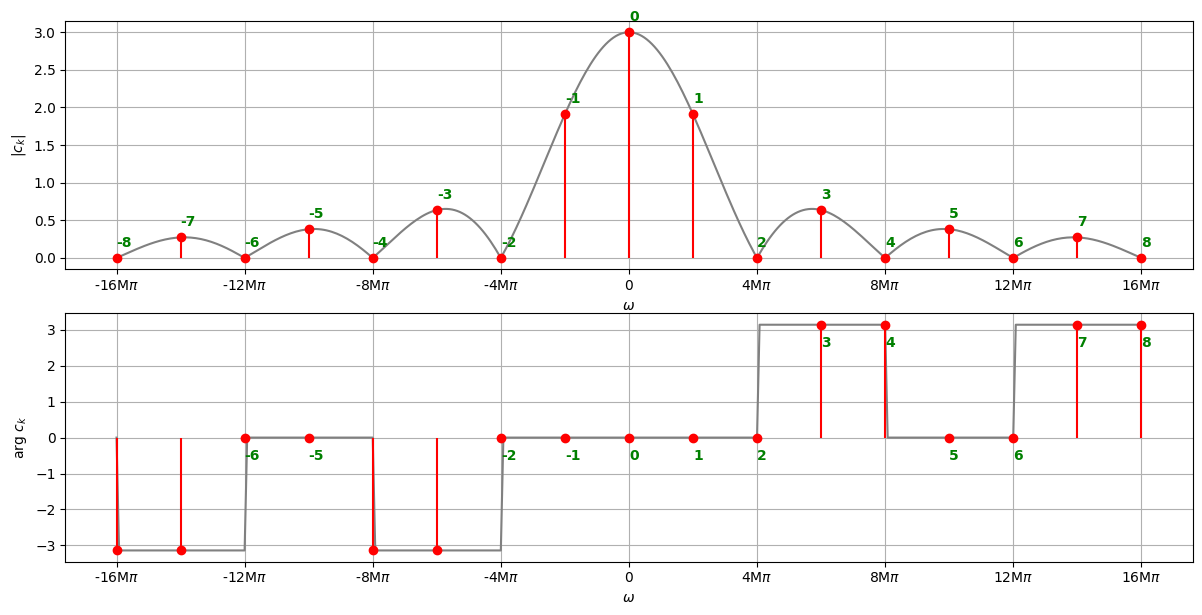

In [ ]:
# its FS ...
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $c_k$')

#plt.savefig('FIG/ck_obd_1MHz.pdf')

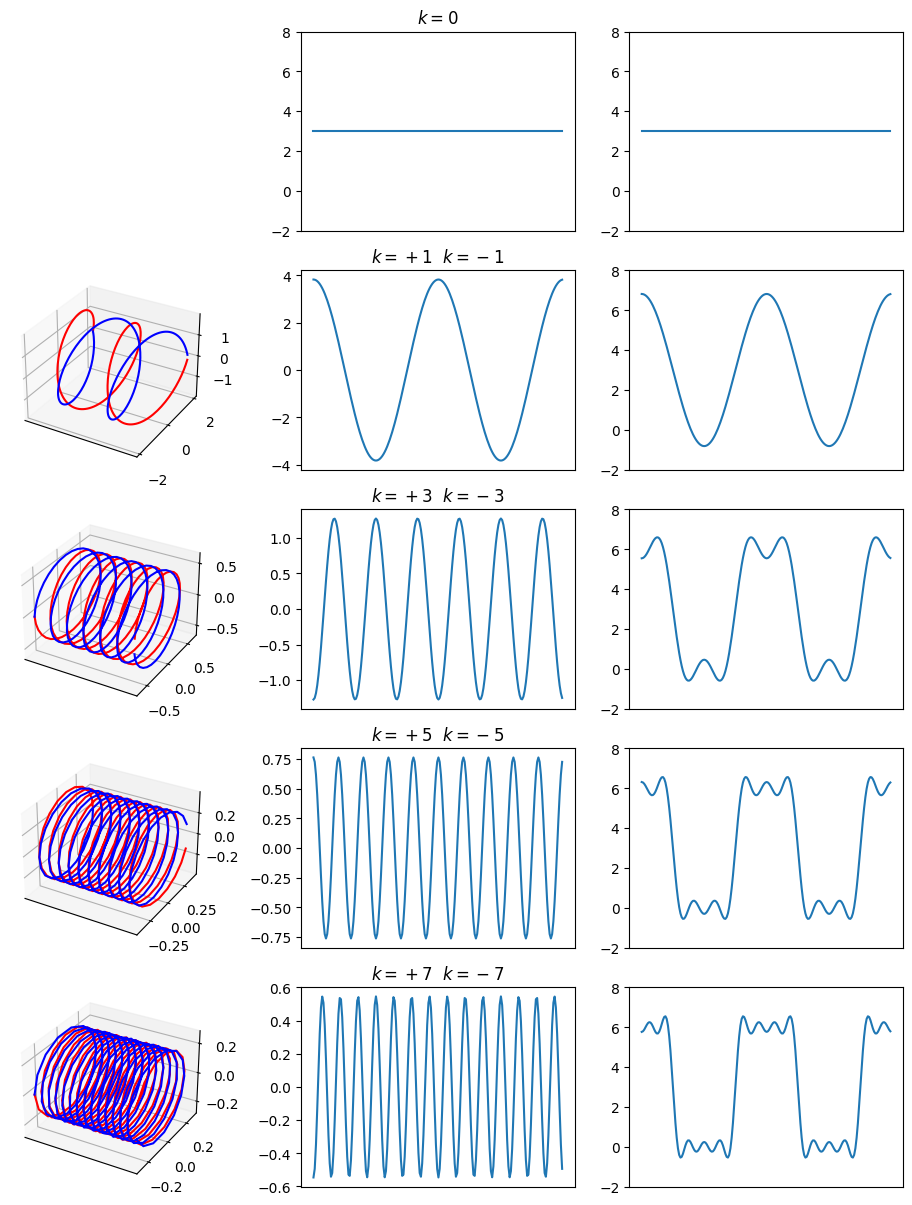

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_synthesis <<<<<<<<<<<<<<<<<<<<<<<<<

# definice casu a obrazku ...
t = np.arange(-T1,T1,T1/100)
#_, ax = plt.subplots(5,3,figsize=(12,15))
timeticks=[]

fig = plt.figure(figsize=(12,15))

# first the special case - d.c.
xsynt = ck[kmax] * np.ones(t.size)
ax = fig.add_subplot(5, 3, 2) #, projection='3d')
ax.plot(t,xsynt)
ax.set_ylim(-2,8)
ax.set_xticks(timeticks)
ax.set_title('$k=$0')

ax = fig.add_subplot(5, 3, 3) #, projection='3d')
ax.plot(t,xsynt)
ax.set_ylim(-2,8)
ax.set_xticks(timeticks)

# ok, now go hard ...
for ii,thisk in enumerate([1,3,5,7]):
    # complex exp ...
    ax = fig.add_subplot(5, 3, (ii+1)*3 + 1, projection='3d')
    pexp = ck[kmax+thisk] * np.exp(1j * thisk * om1 * t)
    mexp = ck[kmax-thisk] * np.exp(-1j * thisk * om1 * t)
    ax.plot3D(t, np.real(pexp), np.imag(pexp),color='r')
    ax.plot3D(t, np.real(mexp), np.imag(mexp),color='b')
    ax.set_xticks([])
    # cos ...
    thiscos = np.real(pexp + mexp) # np.real to be sure ...
    ax = fig.add_subplot(5, 3, (ii+1)*3 + 2)
    ax.plot(t,thiscos)
    ax.set_xticks(timeticks)
    ax.set_title('$k=+$'+str(thisk)+'  $k=-$'+str(thisk))
    # cummulative sum ...
    xsynt = xsynt + thiscos
    ax = fig.add_subplot(5, 3, (ii+1)*3 + 3)
    ax.plot(t,xsynt)
    ax.set_ylim(-2,8)
    ax.set_xticks(timeticks)

#plt.savefig('FIG/obd_1MHz_synt.pdf')

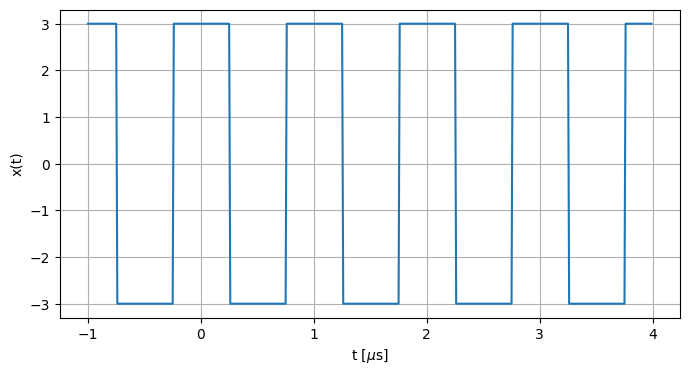

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_zero_dc <<<<<<<<<<<<<<<<<<<<<<<<<

f1 = 1000000
T1 = 1/f1
theta = T1 / 2
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = -3*np.ones(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=3
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_1MHz_ss0.pdf')

Text(112.72222222222221, 0.5, 'arg $c_k$')

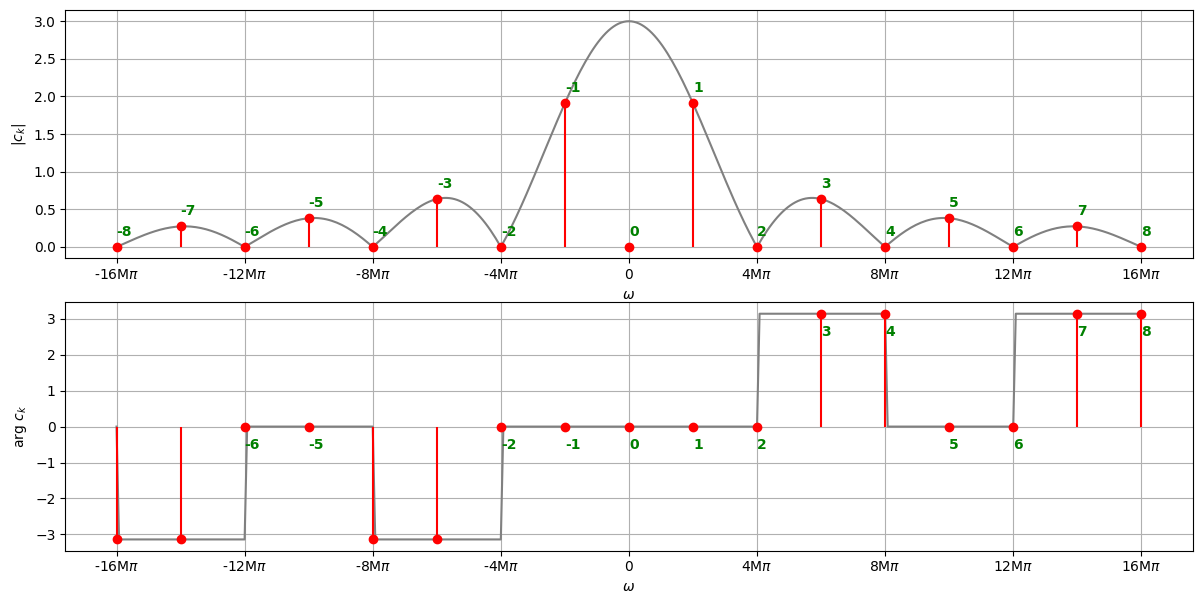

In [ ]:
# a FR ...
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
mck[kmax] = 0 #THIS is the only change
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $c_k$')

#plt.savefig('FIG/ck_obd_1MHz_ss0.pdf')

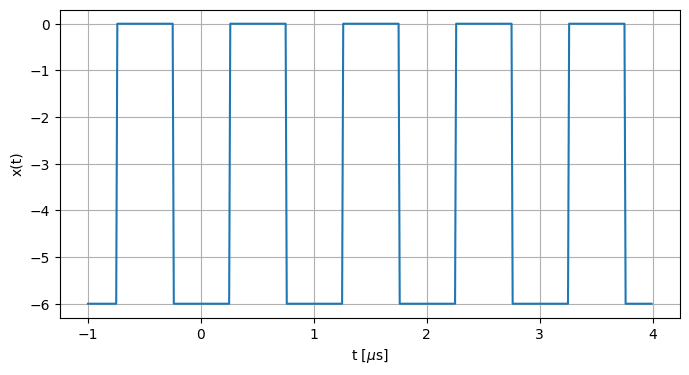

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_minus <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 1000000
T1 = 1/f1
theta = T1 / 2
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=-6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_1MHz_minus.pdf')

[Text(-50265482.457436696, 0, '-16M$\\pi$'),
 Text(-37699111.843077525, 0, '-12M$\\pi$'),
 Text(-25132741.228718355, 0, '-8M$\\pi$'),
 Text(-12566370.614359185, 0, '-4M$\\pi$'),
 Text(-1.4901161193847656e-08, 0, '0'),
 Text(12566370.614359155, 0, '4M$\\pi$'),
 Text(25132741.228718325, 0, '8M$\\pi$'),
 Text(37699111.843077496, 0, '12M$\\pi$'),
 Text(50265482.457436666, 0, '16M$\\pi$')]

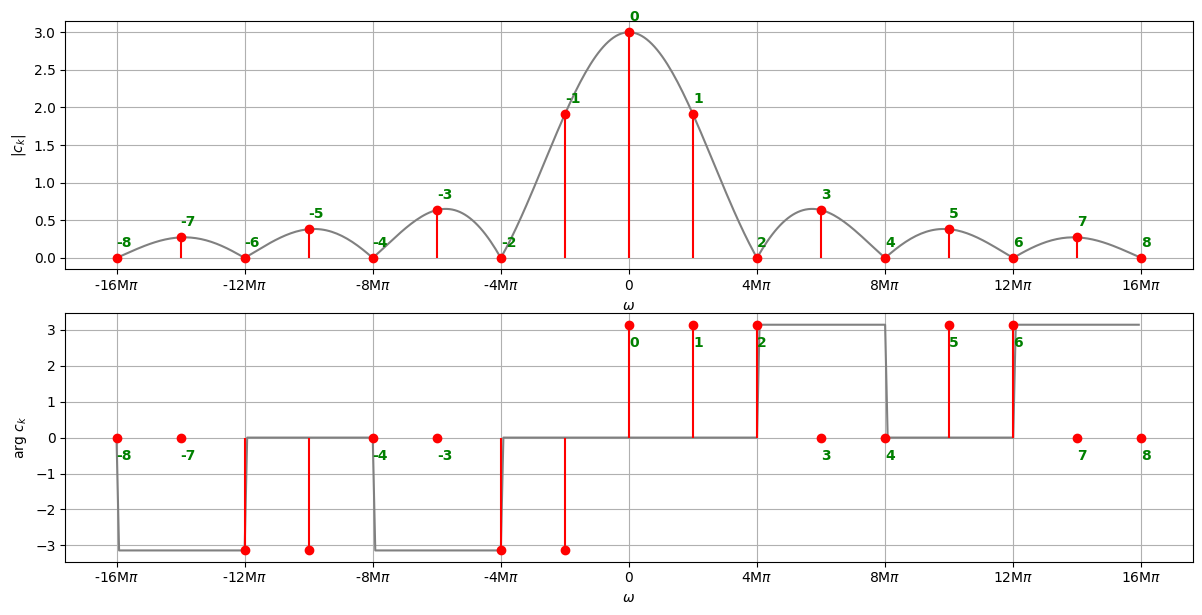

In [ ]:
# a FR ...
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = -D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $c_k$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

#plt.savefig('FIG/ck_obd_1MHz_minus.pdf')

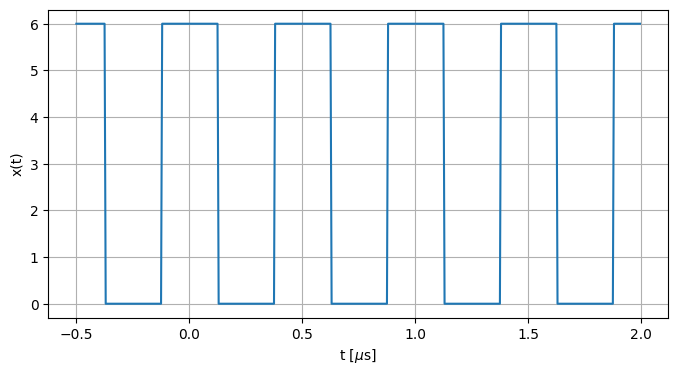

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_faster <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 2000000
T1 = 1/f1
theta = T1 / 2
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_1MHz_2xfaster.pdf')

Text(112.72222222222221, 0.5, 'arg $c_k$')

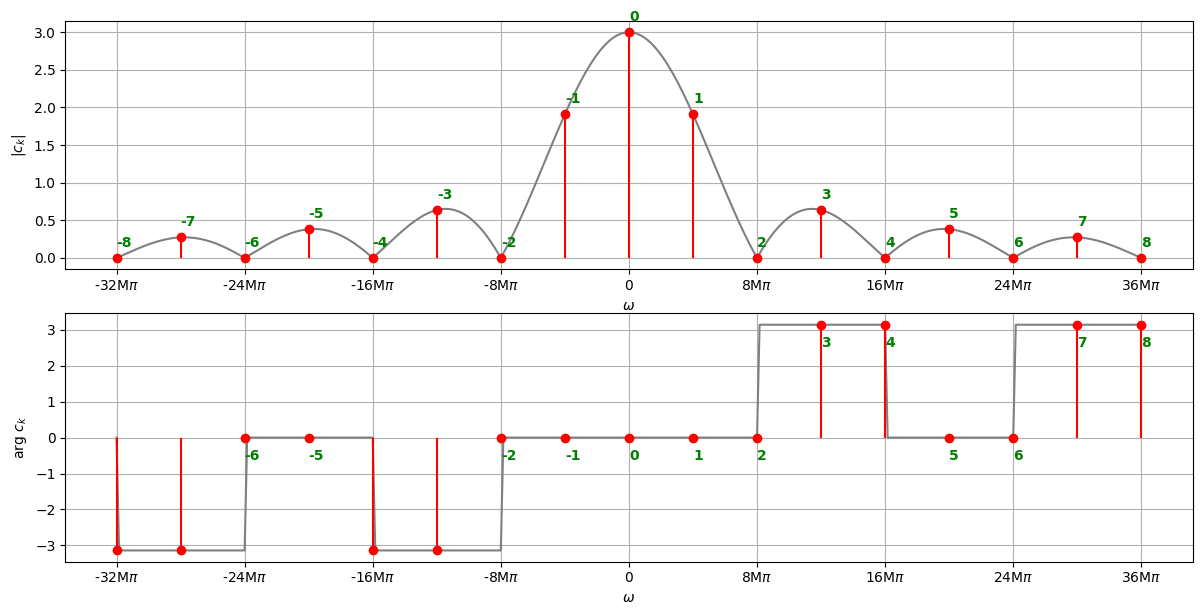

In [ ]:
# a FR ...
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-32M$\pi$', '-24M$\pi$', '-16M$\pi$', '-8M$\pi$', '0', '8M$\pi$', '16M$\pi$', '24M$\pi$', '36M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $c_k$')

#plt.savefig('FIG/ck_obd_1MHz_2xfaster.pdf')

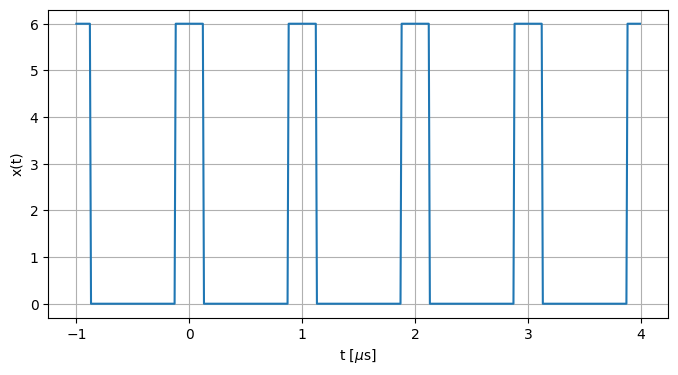

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_narrower <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 1000000
T1 = 1/f1
theta = T1 / 4
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*100]=6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()

Text(112.72222222222221, 0.5, 'arg $c_k$')

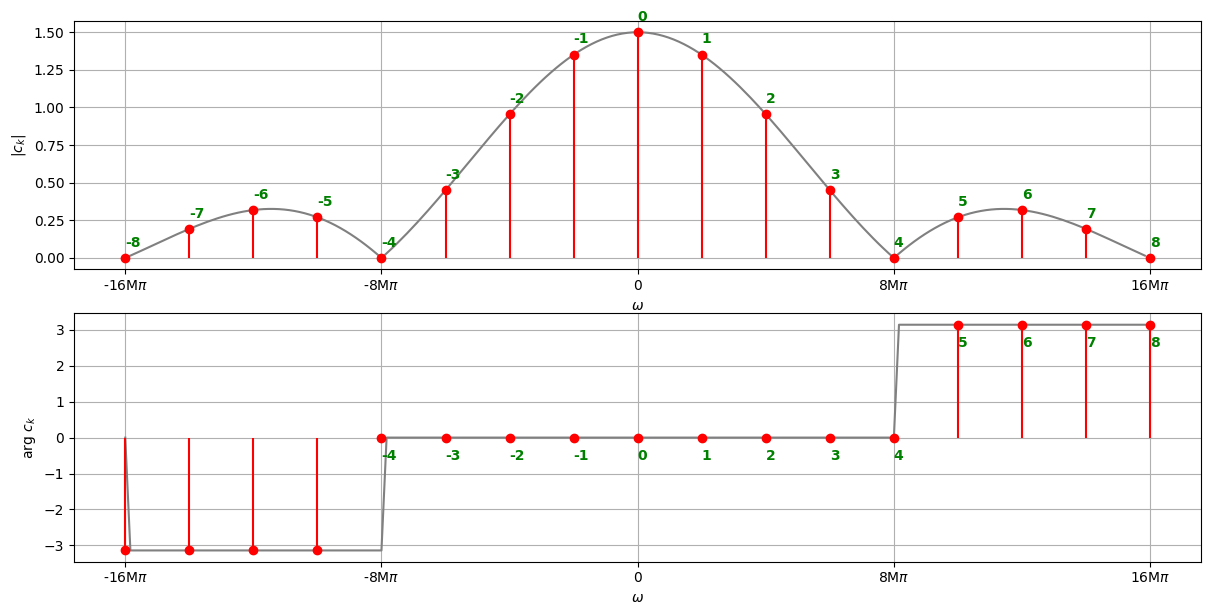

In [ ]:
# a FR ...
om = np.arange(-2*om_cross, 2*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(2 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]
#print(om_cross / np.pi)
omticks = np.arange(-2*om_cross,3*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-8M$\pi$',  '0',  '8M$\pi$',  '16M$\pi$' ]

fig, ax = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout()

ax[0].plot(om,msinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, mck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray')
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[1].annotate(k[ii], (k[ii] * om1, ack[ii]-np.pi/5),color='g',fontweight='bold')
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $c_k$')

#plt.savefig('FIG/ck_obd_1MHz_ss0.pdf')

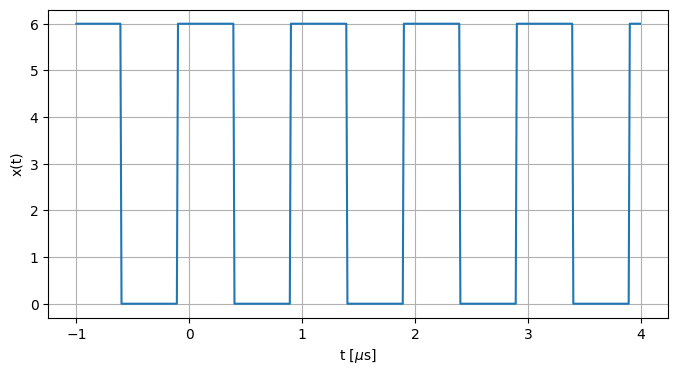

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_delayed <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 1000000
T1 = 1/f1
theta = T1 / 2
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/100)
x = np.zeros(t.size)
indices = np.argwhere( (t > (-theta/2+T1/7)) & (t < (+theta/2+T1/7)))
for ii in range(-1,4):
  x[indices+ii*100]=6
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()
#plt.savefig('FIG/obd_1MHz_posun.pdf')

Text(0, 0.5, 'arg $c_k$')

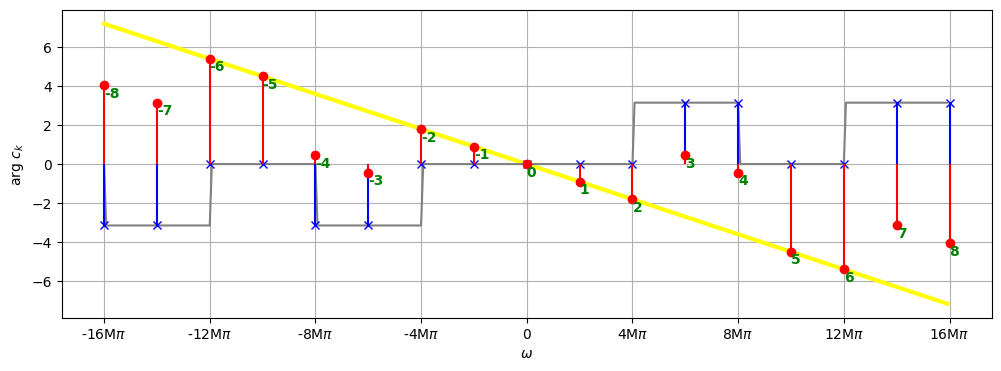

In [ ]:
# a FR ...
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

#--- here the new ones ---
tau = T1 / 7
acky = ack - tau * om1 * k

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

plt.figure(figsize=(12,4))
ax = plt.gca()
#  pomocnou caru ...
auxarg = -tau * om
ax.plot(om,auxarg,color='yellow',linewidth=3)
ax.plot(om,asinc,color='gray')
ax.grid()
ax.stem(k*om1,ack,basefmt=" ",linefmt='b',markerfmt='bx')
ax.stem(k*om1,acky,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax.annotate(k[ii], (k[ii] * om1, acky[ii]-np.pi/5),color='g',fontweight='bold')
ax.set_xlabel('$\omega$')
ax.set_xticks(omticks)
ax.set_xticklabels(omticklabels)
ax.set_ylabel('arg $c_k$')

#plt.savefig('FIG/ck_obd_1MHz_posun.pdf')

Text(0, 0.5, 'arg $c_k$')

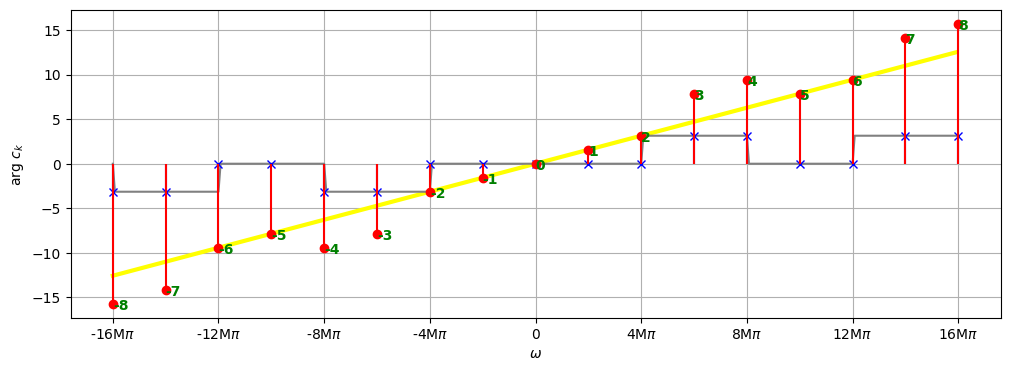

In [ ]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_advanced <<<<<<<<<<<<<<<<<<<<<<<<<
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(4 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

#--- here the new ones ---
tau = T1 / 4
acky = ack + tau * om1 * k

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

plt.figure(figsize=(12,4))
ax = plt.gca()
#  pomocnou caru ...
auxarg = tau * om
ax.plot(om,auxarg,color='yellow',linewidth=3)
ax.plot(om,asinc,color='gray')
ax.grid()
ax.stem(k*om1,ack,basefmt=" ",linefmt='b',markerfmt='bx')
ax.stem(k*om1,acky,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax.annotate(k[ii], (k[ii] * om1, acky[ii]-np.pi/5),color='g',fontweight='bold')
ax.set_xlabel('$\omega$')
ax.set_xticks(omticks)
ax.set_xticklabels(omticklabels)
ax.set_ylabel('arg $c_k$')


#plt.savefig('FIG/ck_obd_1MHz_predbeh.pdf')